# Experiments

### Algorithms 

Algorithms differ in how they define biclusters. Some of the common types include:
- constant values, constant rows, or constant columns
- unusually high or low values
- submatrices with low variance
- correlated rows or columns

Algorithms also differ in how rows and columns may be assigned to biclusters, which leads to different bicluster structures. Block diagonal or checkerboard structures occur when rows and columns are divided into partitions.

If each row and each column belongs to exactly one bicluster, then rearranging the rows and columns of the data matrix reveals the biclusters on the diagonal. 

In the checkerboard case, each row belongs to all column clusters, and each column belongs to all row clusters.

### Bicluster Taxonomy

Several types of biclusters have been described and categorised in the literature, depending on
the pattern exhibited by the genes across the experimental conditions.
* **Constant values**: A bicluster with constant values reveals subsets of genes with similar ex-
pression values within a subset of conditions. 
* **Constant values on rows or columns**: A bicluster with constant values in the rows/columns identifies a subset of genes/conditions with similar expression levels across a subset
of conditions/genes. Expression levels might therefore vary from gene to gene or from condition to condition. 
* **Coherent values on both rows and columns**: This kind of bicluster identifies more complex relationships between genes and conditions, either in an additive or multiplicative way-
* **Coherent evolutions**: Evidence that a subset of genes is up-regulated or down-regulated
across a subset of conditions without taking into account their actual expression values. In
this situation, data in the bicluster do not follow any mathematical model.

### Shifting and Scaling Expression Patterns

Possible patterns in gene expression data (does not necessarily apply to Bonferroni corrected p-values). Shifting and scaling patterns are defined using numerical relationships between the values in a bicluster. 
* **Perfect shifting pattern**: The bicluster values can be obtained by adding a constant condition number to a typical value for each gene.
* **Perfect scaling patterns**: The biclsuter values can be obtained by multiplying a typical value for the gene by a scaling coefficient. In this case, the genes do not follow a paral-
lel tendency. Although the genes present the same behaviour with regard to the regulation,
changes are more abrupt for some genes than for others.
* **Perfect shifting and scaling patterns**: A bicluster includes a shifting, a scaling or both shifting and scaling patterns.

### Scoring metrics

There are two ways of evaluating a biclustering result: internal and external. Internal measures, such as cluster stability, rely only on the data and the result themselves. 

* **Silhouette score**: The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

External measures refer to an external source of information, such as the true solution. When working with real data the true solution is usually unknown, but biclustering artificial data may be useful for evaluating algorithms precisely because the true solution is known.

To compare a set of found biclusters to the set of true biclusters, two similarity measures are needed: a similarity measure for individual biclusters, and a way to combine these individual similarities into an overall score.

* **Jaccard index**: The Jaccard index achieves its minimum of 0 when the biclusters to not overlap at all and its maximum of 1 when they are identical.

In [49]:
import cluster
import datasets

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets.samples_generator as sgen

from sklearn.metrics import consensus_score
from sklearn.datasets import make_checkerboard
from sklearn.datasets import make_blobs

plt.rcParams['font.size'] = 16
plt.rcParams['axes.facecolor'] = 'white'

%matplotlib inline

## Stage 1

NOTES:
* Enable row and column labels properties, and a score method in all algorithms.
* Generate synthetic test data.
* Do grid search with syntetic data to determine optimal hyperparameter settings
    * Use a wrapper with the necessary methods if fit_transform is insufficient (although it seems from sklearn grid search fork that a transform method is sufficient for an estimator meaning that a predict method is not necessarily required)
    * Create a [custom CV](https://stackoverflow.com/questions/34611038/grid-search-for-hyperparameter-evaluation-of-clustering-in-scikit-learn) system that checks the model performance for each hyperparameter setting against each set of synthetic test data.

### Synthetic data gallery

Load characteristics of experimental data and generate test data

In [2]:
data_feats = pd.read_csv(
    './../data/data_characteristics.csv', sep='\t', index_col=0
)
test_data, rows, cols = datasets.gen_test_sets(
    data_feats, sparse=True, shape=(500, 300), n_clusters=3, seed=0
)

Visualize the test data

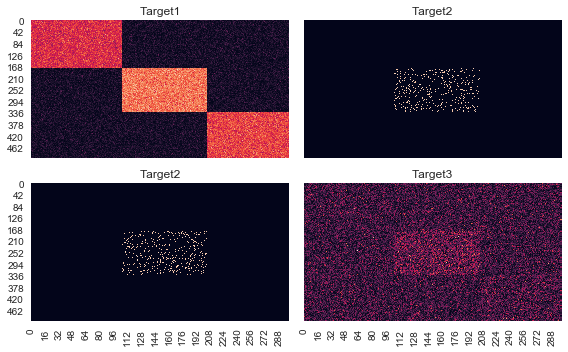

In [51]:
SEED = 0
ncols, nrows = 2, 2
labels = list(test_data.keys())

titles = ['Target1', 'Target2', 'Target3', 'Target4']

fig, axes = plt.subplots(
    ncols=ncols, nrows=nrows, figsize=(8, 5), sharey=True, sharex=True
)
for row in range(nrows):
    for col in range(ncols):
        _data = test_data[labels[col + row]]
        sns.heatmap(
            _data, ax=axes[row, col], cbar=False,
            vmin=np.min(_data), vmax=np.max(_data)
        )
        axes[row, col].set_title(titles[row + col])

plt.tight_layout()

### Grid search

In [52]:
# params = {'shape': (500, 300), 'n_clusters': 3, 'random_state': 0}

In [5]:
# NOTES Experiments:
# Stage 0: Clustering synthetic data
# - Generate sample data similar to the four types of experimental data
# Stage 1: Clustering significant values
# - Cluster the filtered experimental data and evaluate the clusters.
# Stage 2: Clustering original values
# - Cluster the original experimental data and evaluate the clusters.
# Steps to evaluate quality of clusters:
# 1. Perform enrichment step for genes of the found biclusters through GO and KEEG.
# 2. Carry out the evaluation with the clusterProfiler package. 
#     - Consider a a bicluster considered enriched teh corresponding adjusted p-value from the 
#    Benjamini and Hochberg multiple test correction was smaller than 0.05.

In [6]:
# Strategy:

# Run experiment with sklearn algorithms only as they have correct API implemented 

# Generate test data:
# * The number of clusters are really unknown. The algorithm capability
#   to determine the correct number of cluters must be checked.

## Stage 2

In [7]:
#orig_pvalues = pd.read_csv('./../data/train/orig_pvalues_prep.csv', sep=',', index_col=0)
#orig_ccp = pd.read_csv('./../data/train/orig_pcc_prep.csv', sep=',', index_col=0)